In [1]:
from ydata_profiling import ProfileReport
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import load_model
from helpers6 import PlotROCCurve, get_lstm_data_gen
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
output_path = 'C:\\Users\\User\\Downloads'
path = output_path
train = pd.read_csv((os.path.join(path, 'train_impute_upsample.csv')))
test = pd.read_csv((os.path.join(path, 'test_impute_upsample.csv')))

In [3]:
pd.set_option('display.max_columns', 150) 
pd.set_option('display.max_rows', 100) 
train.head()

,intime_ed,outtime_ed,gender,age,outcome_hospitalization,outcome_inhospital_mortality,ed_death,outcome_icu_transfer_12h,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,insurance_Medicaid,insurance_Medicare,insurance_Other,triage_MAP,score_CCI,score_CART,score_REMS,score_NEWS,score_NEWS2,score_MEWS
0,2166-09-20 16:52:00,2166-09-20 16:57:00,F,31.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08,36.833333,76.0,16.0,100.0,128.0,56.0,5.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.000000,74.0,17.0,99.0,122.0,62.0,0.0,2.0,0.0,0,0,0,80.000000,0,0,0,0,0,1
1,2183-03-28 13:50:00,2183-03-28 14:03:00,F,66.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.22,37.000000,86.0,17.0,99.0,156.0,80.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,36.666667,74.0,18.0,100.0,137.0,74.0,0.0,0.0,0.0,0,0,0,105.333333,5,4,5,0,0,1
2,2117-06-27 15:30:00,2117-06-28 14:04:00,M,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.57,36.944444,84.0,18.0,99.0,133.0,77.0,4.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.444444,68.0,28.0,100.0,151.0,85.0,8.0,5.0,0.0,0,0,1,95.666667,0,0,0,0,0,1
3,2160-01-30 21:34:00,2160-01-30 21:40:00,M,53.0,0,0,0,0,0,0,0,5,1,0,0,5,0,0,0,0.10,36.888889,78.0,16.0,95.0,150.0,72.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,36.833333,74.0,16.0,95.0,118.0,83.0,0.0,0.0,0.0,0,0,0,98.000000,2,0,2,1,0,1
4,2160-05-05 16:20:00,2160-05-05 16:39:00,F,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.32,37.166667,88.0,18.0,100.0,120.0,73.0,7.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.722222,77.0,17.0,99.0,126.0,73.0,0.0,1.0,6.0,0,0,0,88.666667,0,0,0,0,0,1


In [4]:
train = train[(train['outcome_inhospital_mortality'] == 0) & (train['ed_death'] == 0)]
test = test[(test['outcome_inhospital_mortality'] == 0) & (test['ed_death'] == 0)]


In [5]:
profile = ProfileReport(train,title = "HealthdataProfiling")
profile.to_file("HealthdataProfiling")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
pd.set_option('display.max_rows', 105) 
pd.set_option('display.max_columns', 105) 

train.dtypes
train.columns

Index(['intime_ed', 'outtime_ed', 'gender', 'age', 'outcome_hospitalization',
       'outcome_inhospital_mortality', 'ed_death', 'outcome_icu_transfer_12h',
       'outcome_critical', 'n_ed_30d',
       ...
       'insurance_Medicaid', 'insurance_Medicare', 'insurance_Other',
       'triage_MAP', 'score_CCI', 'score_CART', 'score_REMS', 'score_NEWS',
       'score_NEWS2', 'score_MEWS'],
      dtype='object', length=105)

In [7]:
variable = ["age", "gender", "intime_ed", "outtime_ed", 
            #"outcome_hospitalization", 
            "outcome_icu_transfer_12h", 
            #"outcome_critical",
            
            
            "n_ed_30d", 
            #"n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
            "n_hosp_365d", "n_icu_30d", 
            #"n_icu_90d", "n_icu_365d", 
            "ed_los_hours",
            "triage_temperature",
            #"triage_pain", 
            "triage_acuity", 
            #"triage_heartrate",
            "triage_resprate","triage_o2sat",
            #"triage_sbp",'triage_MAP',
            "triage_dbp",
            
            "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache", 
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope",
            "chiefcom_dizziness",
            
            "cci_MI", 
            #"cci_CHF", 
            "cci_PVD", 
            "cci_Stroke", "cci_Dementia", "cci_Pulmonary", 
            "cci_Rheumatic", "cci_PUD", "cci_Liver1", 
            #"cci_DM1", 
            "cci_DM2", 
            "cci_Paralysis",
            #"cci_Renal", "cci_Cancer1",  "cci_Cancer2", 
            "cci_HIV","cci_Liver2",
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN", 
            #"eci_HTN1", "eci_HTN2",  
            #"eci_CHF",
           #"eci_PVD", "eci_Pulmonary",
            #"eci_Paralysis",
            #"eci_DM1",
            #"eci_DM2",
            #"eci_Renal",
            #"eci_Liver","eci_PUD",
            #"eci_HIV",
            #"eci_Tumor2",
            "eci_Tumor1",
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            #"eci_Rheumatic",
            "eci_Obesity", "eci_WeightLoss", 
            #"eci_FluidsLytes",
            "eci_BloodLoss", 
            "eci_Anemia", "eci_Alcohol", "eci_Drugs", "eci_Psychoses", "eci_Depression",
            
            "ed_temperature_last", "ed_heartrate_last", "ed_resprate_last", 
            "ed_o2sat_last", "ed_sbp_last", 
            #"ed_dbp_last", 
            "ed_pain_last","n_med",
            #"n_medrecon",
           
          'insurance_Medicaid', 'insurance_Medicare', 'insurance_Other',
            #'score_CCI', 'score_CART', 'score_REMS', 
            #'score_NEWS','score_NEWS2', 'score_MEWS'
           ]

outcome = "outcome_ed_revisit_3d"



In [8]:
X_train = train[variable].copy()
y_train = train[outcome].copy()
X_test = test[variable].copy()
y_test = test[outcome].copy()

In [18]:
X_train.dtypes.to_frame().T

,age,gender,intime_ed,outtime_ed,outcome_icu_transfer_12h,n_ed_30d,n_hosp_365d,n_icu_30d,ed_los_hours,triage_temperature,triage_acuity,triage_resprate,triage_o2sat,triage_dbp,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM2,cci_Paralysis,cci_HIV,cci_Liver2,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_Tumor1,eci_NeuroOther,eci_Hypothyroid,eci_Lymphoma,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_pain_last,n_med,insurance_Medicaid,insurance_Medicare,insurance_Other
0,float64,object,object,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64


In [9]:
encoder = LabelEncoder()
X_train['gender'] = encoder.fit_transform(X_train['gender'])
X_test['gender'] = encoder.transform(X_test['gender'])

X_train['intime_ed'] = pd.to_datetime(X_train['intime_ed']).dt.hour
X_test['intime_ed'] = pd.to_datetime(X_test['intime_ed']).dt.hour

X_train['outtime_ed'] = pd.to_datetime(X_train['outtime_ed']).dt.hour
X_test['outtime_ed'] = pd.to_datetime(X_test['outtime_ed']).dt.hour


In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9537556518239708


In [13]:
FI = clf.feature_importances_
df = pd.DataFrame({'Feature':X_train.columns,'Importances':FI}).sort_values(by = "Importances",ascending = False)
df

,Feature,Importances
8,ed_los_hours,0.103866
5,n_ed_30d,0.094739
0,age,0.073421
56,ed_sbp_last,0.072320
13,triage_dbp,0.071869
...,...,...
4,outcome_icu_transfer_12h,0.000953
27,cci_Dementia,0.000853
42,eci_Lymphoma,0.000639
17,chiefcom_shortness_of_breath,0.000244


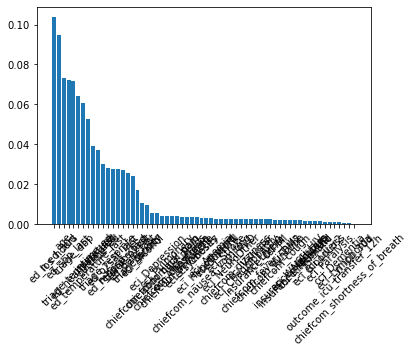

In [14]:
plt.bar(df['Feature'],df['Importances'])
plt.xticks(rotation=45)
plt.show()

In [15]:
list(df["Feature"][0:])

['ed_los_hours',
 'n_ed_30d',
 'age',
 'ed_sbp_last',
 'triage_dbp',
 'triage_temperature',
 'ed_heartrate_last',
 'ed_temperature_last',
 'intime_ed',
 'outtime_ed',
 'n_med',
 'triage_resprate',
 'ed_o2sat_last',
 'ed_resprate_last',
 'n_hosp_365d',
 'triage_o2sat',
 'ed_pain_last',
 'triage_acuity',
 'eci_Alcohol',
 'gender',
 'chiefcom_abdominal_pain',
 'eci_Depression',
 'chiefcom_back_pain',
 'cci_Pulmonary',
 'chiefcom_chest_pain',
 'chiefcom_headache',
 'eci_Arrhythmia',
 'eci_Drugs',
 'eci_Psychoses',
 'eci_Obesity',
 'chiefcom_nausea_vomiting',
 'eci_Hypothyroid',
 'eci_Anemia',
 'eci_Tumor1',
 'eci_PHTN',
 'cci_Stroke',
 'eci_NeuroOther',
 'chiefcom_dizziness',
 'cci_PVD',
 'eci_Coagulopathy',
 'eci_Valvular',
 'insurance_Other',
 'chiefcom_fever_chills',
 'cci_Liver1',
 'chiefcom_syncope',
 'cci_MI',
 'chiefcom_cough',
 'cci_DM2',
 'insurance_Medicare',
 'insurance_Medicaid',
 'eci_WeightLoss',
 'cci_Rheumatic',
 'cci_HIV',
 'cci_PUD',
 'eci_BloodLoss',
 'cci_Liver2',
 'cci

In [10]:
new_variables = ['ed_los_hours',
 'triage_dbp',
 'ed_sbp_last',
 'age',
 'triage_temperature',
 'ed_heartrate_last',
 'ed_temperature_last',
 'n_ed_30d',
 'intime_ed',
 'outtime_ed',
 'n_med',
 'triage_resprate',
 'ed_resprate_last',
 'ed_o2sat_last',
 'triage_o2sat',
 'ed_pain_last',
 'n_hosp_365d',
 'triage_acuity'
                ]

In [11]:
X_train2 = X_train[new_variables]
X_test2 = X_test[new_variables]

print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

class ratio
positive : negative = -0.03366867391562916 : 1


In [12]:
# Containers for all results
result_list = []

In [13]:
import time

Logistic Regression:


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training time: 7.995930433273315 seconds
AUC: 0.6765412314398896
AUPRC: 0.13281417837912352
Sensitivity: 0.6040789899643898
Specificity: 0.6284548409290408
Score thresold: 0.03130631416850121
2.5 97.5


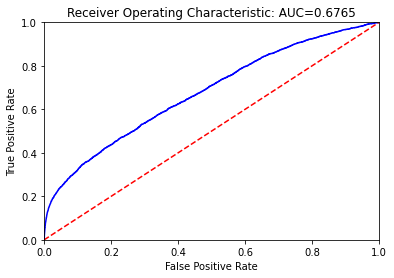

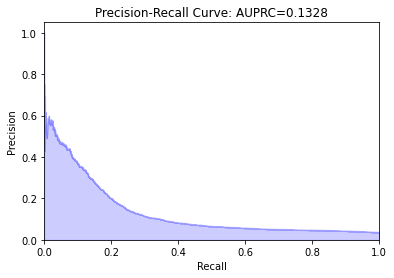

In [14]:
confidence_interval = 95
random_seed = 0

print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
start = time.time()
logreg.fit(X_train2,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(X_test2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list.append(results)


# fpr, tpr, _ = metrics.roc_curve(y_test, probs[::,1])
# auc = metrics.roc_auc_score(y_test, probs[::,1])

#create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()




RandomForest:
Training time: 139.73169612884521 seconds
AUC: 0.6960469911475138
AUPRC: 0.13501620181068696
Sensitivity: 0.6532858530268696
Specificity: 0.6156793433133259
Score thresold: 0.04
2.5 97.5


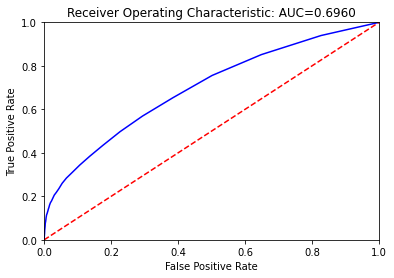

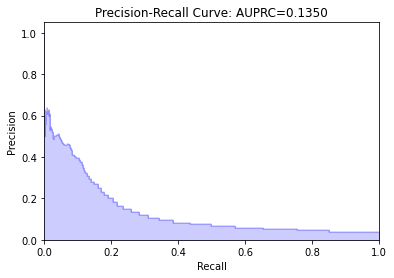

[0.09350161 0.08286237 0.08124591 0.08164177 0.07566924 0.07514074
 0.06589301 0.05021085 0.05457186 0.05329836 0.04196525 0.03876943
 0.03682015 0.03795766 0.03752333 0.03230028 0.04365129 0.01697687]


In [15]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
start = time.time()
rf.fit(X_train2,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = rf.predict_proba(X_test2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)
results = ["RF"]
results.extend(result)
results.append(runtime)
result_list.append(results)



# fpr, tpr, _ = metrics.roc_curve(y_test, probs[::,1])
# auc = metrics.roc_auc_score(y_test, probs[::,1])
#create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()




GradientBoosting:
Training time: 130.19189023971558 seconds
AUC: 0.7359965027766834
AUPRC: 0.15413185556260633
Sensitivity: 0.6451926189705406
Specificity: 0.6822732556760219
Score thresold: 0.033380634282678914
2.5 97.5


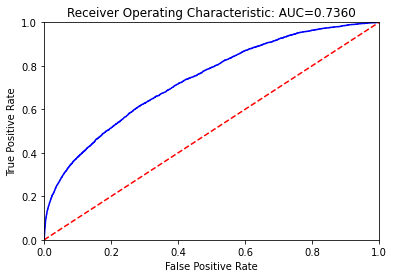

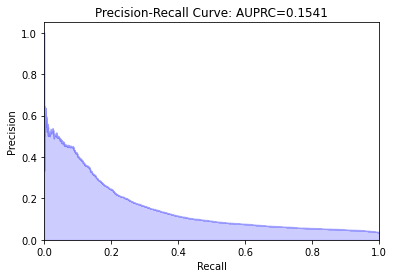

In [16]:
print("GradientBoosting:")
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
start = time.time()
gb.fit(X_train2, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = gb.predict_proba(X_test2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB"]
results.extend(result)
results.append(runtime)
result_list.append(results)

# fpr, tpr, _ = metrics.roc_curve(y_test, probs[::,1])
# auc = metrics.roc_auc_score(y_test, probs[::,1])
#create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()



In [21]:
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense_1 = Dense(128, activation='relu')
        self.dense_2 = Dense(64, activation='relu')
        self.classifier = Dense(1, activation='sigmoid')

    def call(self, x):
        x = self.dense_1(x)
        x = self.dense_2(x)
        return self.classifier(x)
    


Epoch 1/20
1747/1747 [==============================] - 8s 3ms/step - loss: 0.1741 - accuracy: 0.9645 - auc: 0.6082 - true_positives: 537.0000 - true_negatives: 336403.0000 - precision: 0.4090 - recall: 0.0441
Epoch 2/20
1747/1747 [==============================] - 6s 3ms/step - loss: 0.1462 - accuracy: 0.9655 - auc: 0.6322 - true_positives: 572.0000 - true_negatives: 336739.0000 - precision: 0.5652 - recall: 0.0470
Epoch 3/20
1747/1747 [==============================] - 6s 3ms/step - loss: 0.1424 - accuracy: 0.9655 - auc: 0.6563 - true_positives: 530.0000 - true_negatives: 336759.0000 - precision: 0.5579 - recall: 0.0435
Epoch 4/20
1747/1747 [==============================] - 6s 3ms/step - loss: 0.1398 - accuracy: 0.9654 - auc: 0.6815 - true_positives: 519.0000 - true_negatives: 336761.0000 - precision: 0.5539 - recall: 0.0426
Epoch 5/20
1747/1747 [==============================] - 6s 3ms/step - loss: 0.1384 - accuracy: 0.9655 - auc: 0.6937 - true_positives: 489.0000 - true_negatives:

INFO:tensorflow:Assets written to: 72h_ed_revisit_mlp\assets


In [ ]:
# skip this cell if not retraining
mlp = MLP()
mlp.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC',  #{'auprc': metrics.AUC(name='auprc', curve='PR')},
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
start = time.time()
mlp.fit(X_train2.astype(np.float32), y_train, batch_size=200, epochs=20)
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
mlp.save('72h_ed_revisit_mlp')

MLP:
2731/2731 [==============================] - 5s 2ms/step
AUC: 0.735086211231247
AUPRC: 0.1538924049123569
Sensitivity: 0.643897701521528
Specificity: 0.6837204336789162
Score thresold: 0.04009971
2.5 97.5


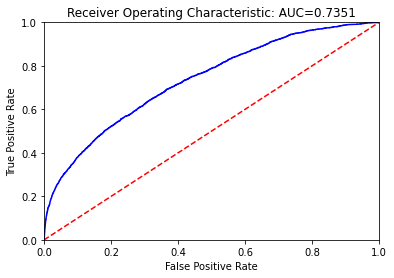

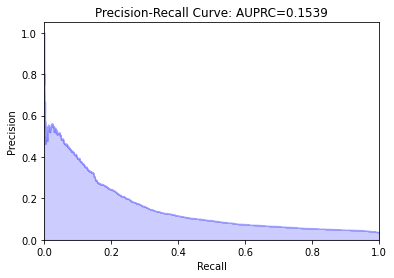

In [26]:
print("MLP:")
#mlp = load_model('72h_ed_revisit_mlp')
probs = mlp.predict(X_test2.astype(np.float32))
result = PlotROCCurve(probs,y_test, ci=confidence_interval, random_seed=random_seed)
results = ["MLP"]
results.extend(result)
results.append(runtime)
result_list.append(results)

# fpr, tpr, _ = metrics.roc_curve(y_test, probs)
# auc = metrics.roc_auc_score(y_test, probs)
#create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(auc))
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()


XGBoosting:
Training time: 18.40060544013977 seconds
AUC: 0.7342752884177781
AUPRC: 0.14445539920514958
Sensitivity: 0.65846552282292
Specificity: 0.6706721074233114
Score thresold: 0.031422626
2.5 97.5


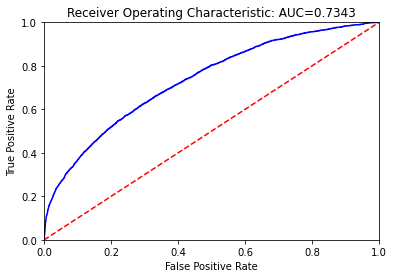

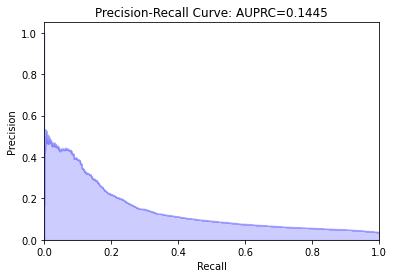

In [32]:
import xgboost as xgb
print("XGBoosting:")
xgb = xgb.XGBClassifier()
start = time.time()
xgb.fit(X_train2, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = xgb.predict_proba(X_test2)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["XGB"]
results.extend(result)
results.append(runtime)
result_list.append(results)



### 4. Performance output

In [33]:
#result_df = pd.read_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'))
result_df = pd.DataFrame(result_list, columns=['Model', 'auroc', 'ap', 'sensitivity', 'specificity', 'threshold', 'lower_auroc', 'upper_auroc', 'std_auroc', 'lower_ap', 'upper_ap', 'std_ap', 'lower_sensitivity', 'upper_sensitivity', 'std_sensitivity', 'lower_specificity', 'upper_specificity', 'std_specificity', 'runtime'])
result_df.to_csv(os.path.join(path, 'result_72h_ed_revivist_disposition.csv'), index=False)
result_df = result_df.round(3)
formatted_result_df = pd.DataFrame()
formatted_result_df[['Model', 'Threshold']] = result_df[['Model', 'threshold']]
formatted_result_df['AUROC'] = result_df['auroc'].astype(str) + ' (' + result_df['lower_auroc'].astype(str) + \
                               '-' + result_df['upper_auroc'].astype(str) + ')'
formatted_result_df['AUPRC'] = result_df['ap'].astype(str) + ' (' + result_df['lower_ap'].astype(str) + \
                               '-' + result_df['upper_ap'].astype(str) + ')'
formatted_result_df['Sensitivity'] = result_df['sensitivity'].astype(str) + ' (' + result_df['lower_sensitivity'].astype(str) + \
                                     '-' + result_df['upper_sensitivity'].astype(str) + ')'
formatted_result_df['Specificity'] = result_df['specificity'].astype(str) + ' (' + result_df['lower_specificity'].astype(str) + \
                                     '-' + result_df['upper_specificity'].astype(str) + ')'
formatted_result_df[['Runtime']] = result_df[['runtime']]
formatted_result_df.to_csv(os.path.join(path, 'task3.csv'), index=False)
formatted_result_df

,Model,Threshold,AUROC,AUPRC,Sensitivity,Specificity,Runtime
0,LR,0.031,0.677 (0.669-0.687),0.133 (0.122-0.143),0.604 (0.567-0.615),0.628 (0.621-0.675),7.996
1,RF,0.040,0.696 (0.684-0.707),0.135 (0.124-0.147),0.653 (0.593-0.674),0.616 (0.612-0.664),139.732
2,GB,0.033,0.736 (0.725-0.746),0.154 (0.142-0.165),0.645 (0.611-0.672),0.682 (0.659-0.717),130.192
3,MLP,1.000,0.541 (0.535-0.552),0.039 (0.038-0.041),0.566 (0.487-0.599),0.496 (0.461-0.591),130.192
4,MLP,0.040,0.735 (0.724-0.743),0.154 (0.142-0.163),0.644 (0.637-0.7),0.684 (0.635-0.696),115.250
5,MLP,0.040,0.735 (0.724-0.743),0.154 (0.142-0.163),0.644 (0.637-0.7),0.684 (0.635-0.696),115.250
6,GB,0.031,0.734 (0.724-0.743),0.144 (0.136-0.157),0.658 (0.629-0.682),0.671 (0.66-0.71),18.401


In [25]:
importance_df = pd.DataFrame(zip(variable, importances), columns=['Variable','Importance'])
importance_df.to_csv(os.path.join(path, 'importances_72h_ed_revisit_disposition.csv'))
importance_df.sort_values(by='Importance', axis=0,ascending=False)

,Variable,Importance
0,age,0.093502
1,gender,0.082862
3,outtime_ed,0.081642
2,intime_ed,0.081246
4,outcome_icu_transfer_12h,0.075669
5,n_ed_30d,0.075141
6,n_hosp_365d,0.065893
8,ed_los_hours,0.054572
9,triage_temperature,0.053298
7,n_icu_30d,0.050211
